# PROJECT TYPE EDA
# CONTRIBUTION - INDIVIUAL
# PROJECT NAME - Air Quality Monitoring and Forecasting
#***project summary***
This project focuses on Air Quality Index (AQI) prediction and analysis using real-world air pollution data. It includes:

Data preprocessing to handle missing values and format timestamps.

Exploratory analysis through pairplots and pollutant trend graphs.

AQI prediction using Linear Regression and Random Forest, comparing model performance.

Time-series forecasting using Prophet to predict future AQI trends.

AQI categorization into Good, Moderate, and Poor with a visual pie chart summary.

The project effectively combines machine learning and time series forecasting with insightful visualizations to monitor and predict air quality.




In [ ]:
# Initializing Pandas for DataFrame Operations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from prophet import Prophet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load dataset
df = pd.read_csv('/content/data_air.csv')

# Displaying the first few rows
print(df.head())

# Checking Number of Rows and Columns
print("Shape:", df.shape)

# Replacing Null Values Using Forward Fill Method
df.fillna(method='ffill', inplace=True)

# Summarizing Missing Data by Column
print("Missing values:\n", df.isnull().sum())

   location_id                datetimeUtc  pm2.5  pm10    o3   no2   so2  \
0         5408  2025-05-01 00:15:00+00:00     19    28   4.1  35.9  10.0   
1         5408  2025-05-01 00:30:00+00:00     19    28   5.5  36.1   9.5   
2         5408  2025-05-01 00:45:00+00:00     19    28   8.0  36.0   9.2   
3         5408  2025-05-01 01:00:00+00:00     19    28   8.4  34.6   8.9   
4         5408  2025-05-01 01:30:00+00:00     17    23  15.3  35.2   8.9   

       co  temperature  humidity  AQI  
0   970.0         22.9        84   48  
1   890.0         23.2        83   45  
2  1030.0         23.4        83   45  
3  1060.0         23.5        82   43  
4   920.0         23.9        78   46  
Shape: (1016, 11)
Missing values:
 location_id    0
datetimeUtc    0
pm2.5          0
pm10           0
o3             0
no2            0
so2            0
co             0
temperature    0
humidity       0
AQI            0
dtype: int64


/tmp/ipython-input-2-2201671525.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


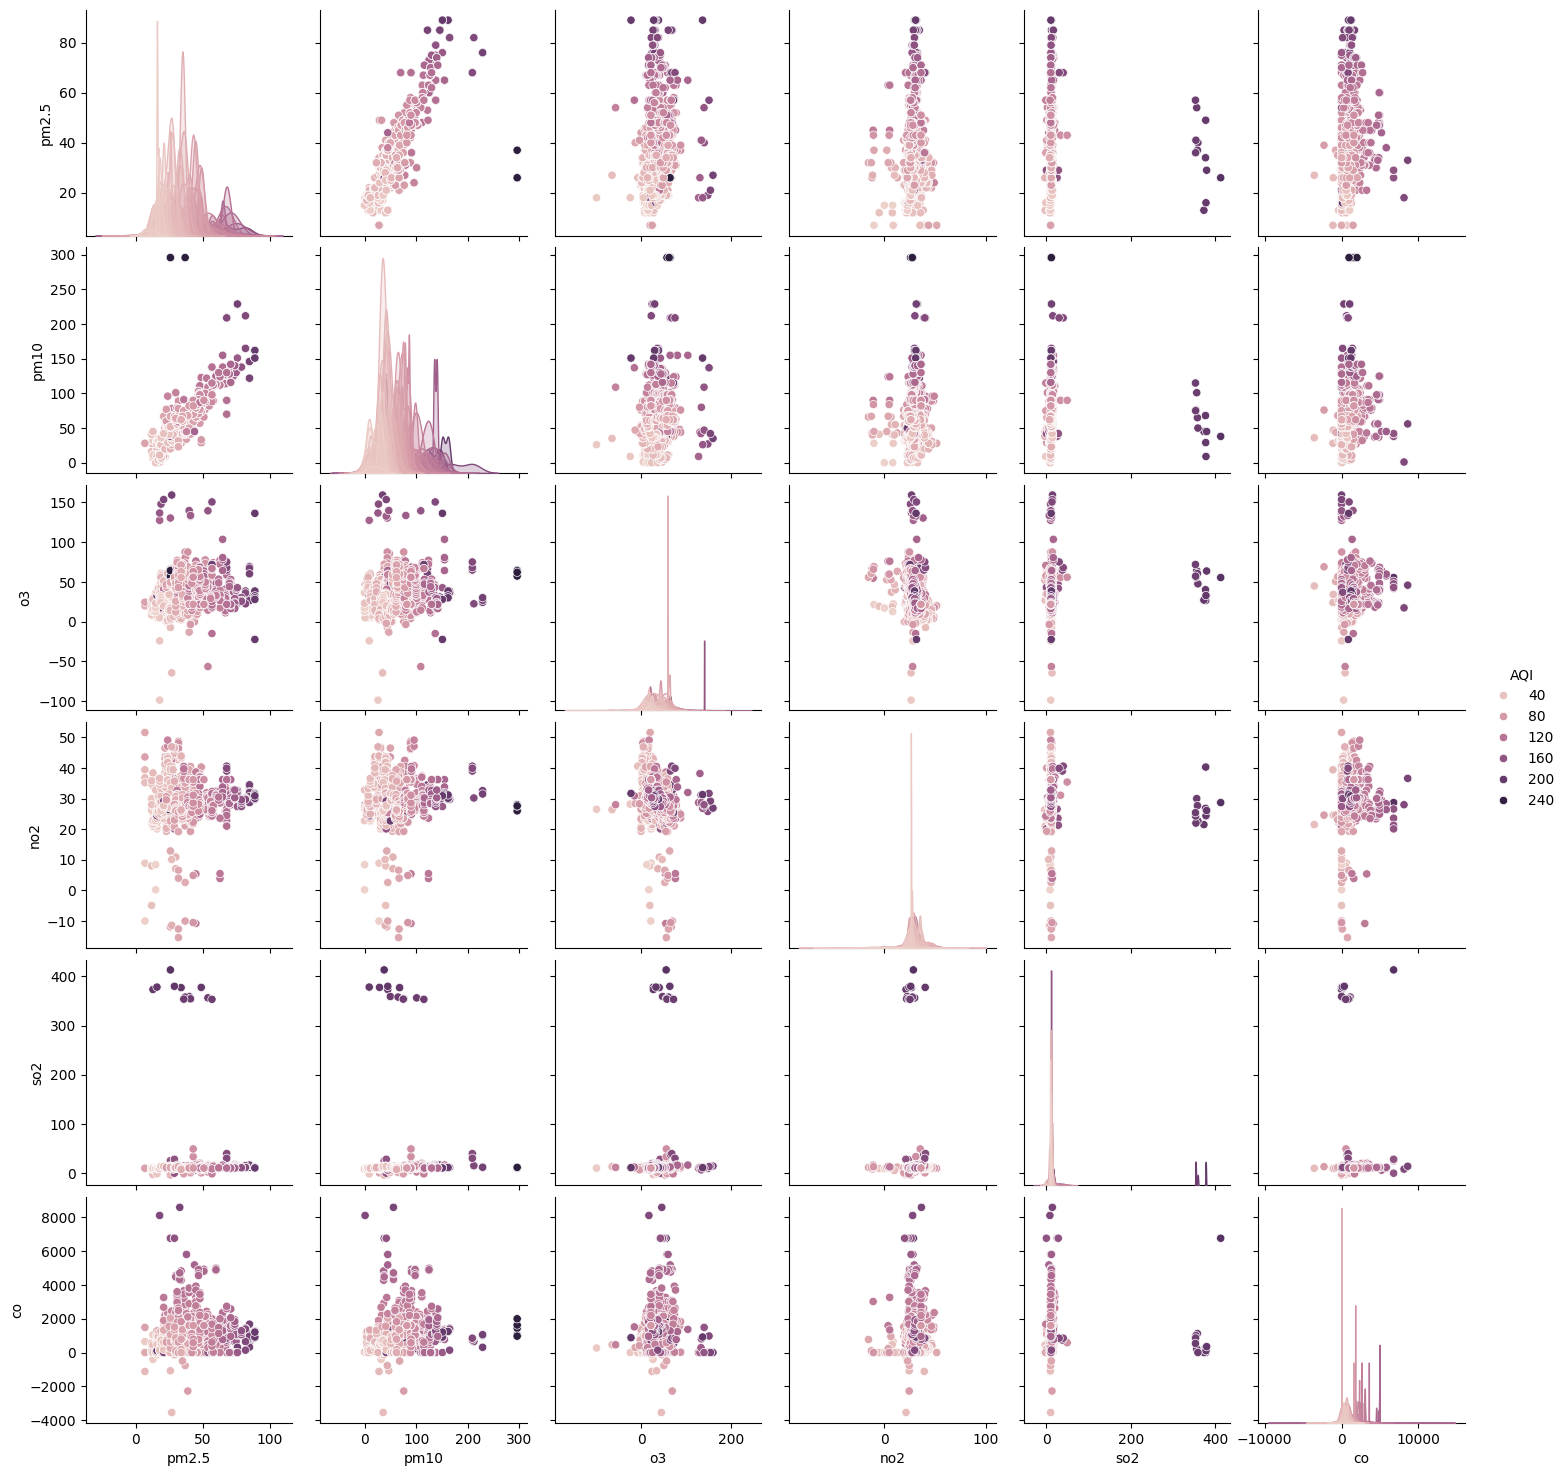

In [ ]:
# Pairplot of Key Pollutants Grouped by AQI
sns.pairplot(df, vars=['pm2.5', 'pm10', 'o3', 'no2', 'so2', 'co'], hue='AQI')
plt.show()

Linear Regression Score: 0.8501564931952639


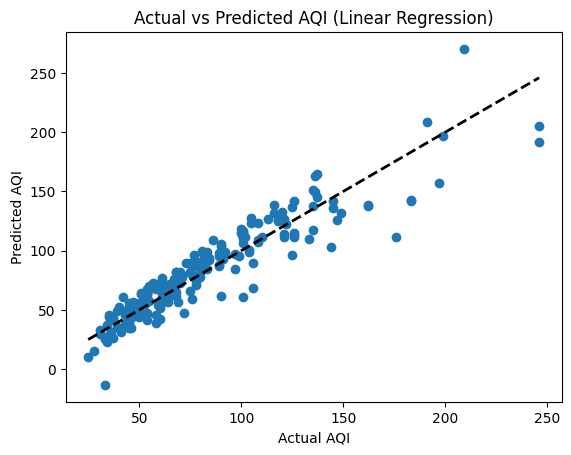

In [ ]:
# Preparing Data for Linear Regression
x = df.drop(['location_id', 'datetimeUtc', 'AQI'], axis=1)
y = df['AQI']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Linear Regression Score:", model.score(x_test, y_test))

# Plot Actual vs Predicted AQI for Linear Regression
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI (Linear Regression)')
plt.show()

Random Forest Score: 0.9849416124578361


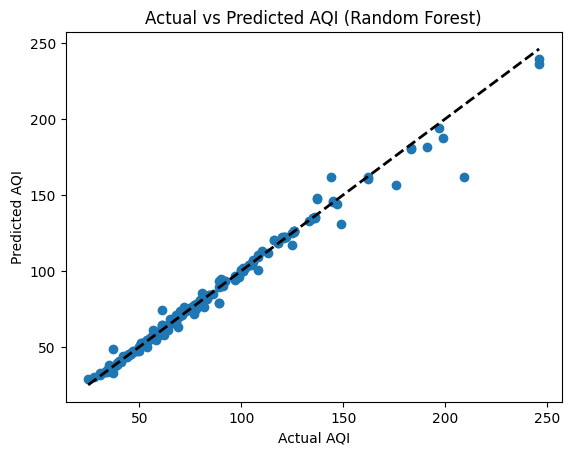

Random Forest Prediction: [74.34]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
print("Random Forest Score:", rf_model.score(x_test, y_test))

# Plot Actual vs Predicted AQI for Random Forest
plt.scatter(y_test, rf_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI (Random Forest)')
plt.show()

# Make a prediction with Random Forest
print("Random Forest Prediction:", rf_model.predict([[25, 80, 18.8, 26.1, 11.5, 260, 32, 46]]))

/tmp/ipython-input-6-3120617154.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('15T').ffill().reset_index()
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56xklqns/kfkx6let.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56xklqns/kskhv81k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18722', 'data', 'file=/tmp/tmp56xklqns/kfkx6let.json', 'init=/tmp/tmp56xklqns/kskhv81k.json', 'output', 'file=/tmp/tmp56xklqns/prophet_modeljniuzwmq/prophet_model-20250626060615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:06:15 - cmdstanpy - INFO - Chain [1

                      ds        yhat  yhat_lower  yhat_upper
1175 2025-05-13 06:00:00  126.686467   87.048075  165.954327
1176 2025-05-13 06:15:00  129.198515   89.108516  166.821272
1177 2025-05-13 06:30:00  131.819567   94.616388  170.129619
1178 2025-05-13 06:45:00  134.491793   95.700565  174.383776
1179 2025-05-13 07:00:00  137.155829  101.081886  177.945381
...                  ...         ...         ...         ...
1370 2025-05-15 06:45:00  161.423519  122.689100  202.984524
1371 2025-05-15 07:00:00  164.087554  123.758201  203.521303
1372 2025-05-15 07:15:00  166.684875  130.102063  204.999514
1373 2025-05-15 07:30:00  169.160103  131.103180  207.422710
1374 2025-05-15 07:45:00  171.463118  133.906188  211.567807

[200 rows x 4 columns]


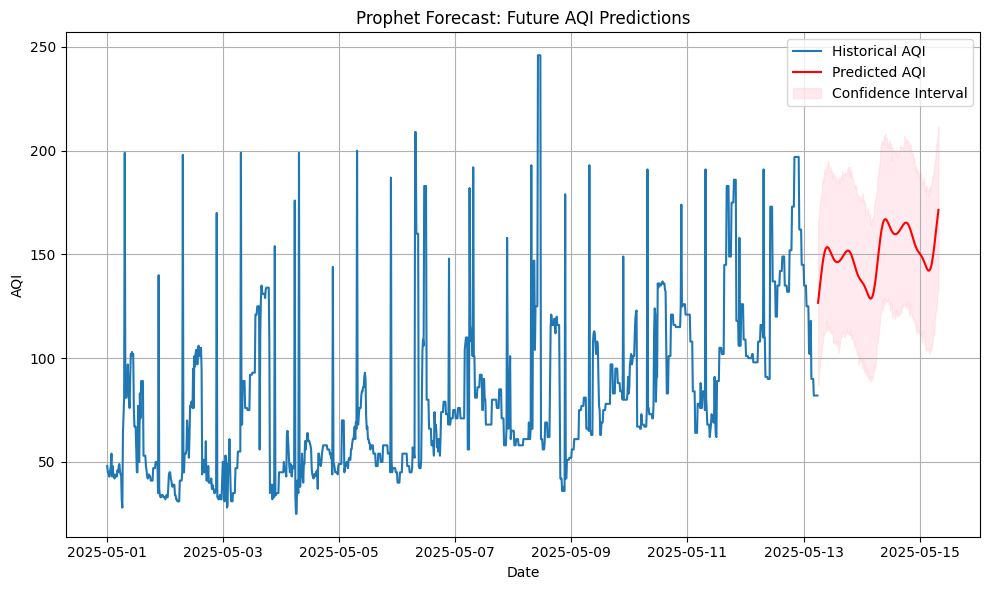

In [ ]:
# Prophet Forecasting
df = df.drop(['location_id'], axis=1)
df['datetimeUtc'] = pd.to_datetime(df['datetimeUtc'], utc=True)
df.set_index('datetimeUtc', inplace=True)
df_resampled = df.resample('15T').ffill().reset_index()
df_resampled['datetimeUtc'] = df_resampled['datetimeUtc'].dt.tz_localize(None)

df_prophet = df_resampled[['datetimeUtc', 'AQI']].rename(columns={'datetimeUtc': 'ds', 'AQI': 'y'})
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=200, freq='15min')
forecast = model.predict(future)

# Display future predictions
last_date = df_prophet['ds'].max()
future_predictions = forecast[forecast['ds'] > last_date][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(future_predictions)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Historical AQI')
plt.plot(future_predictions['ds'], future_predictions['yhat'], label='Predicted AQI', color='red')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Prophet Forecast: Future AQI Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

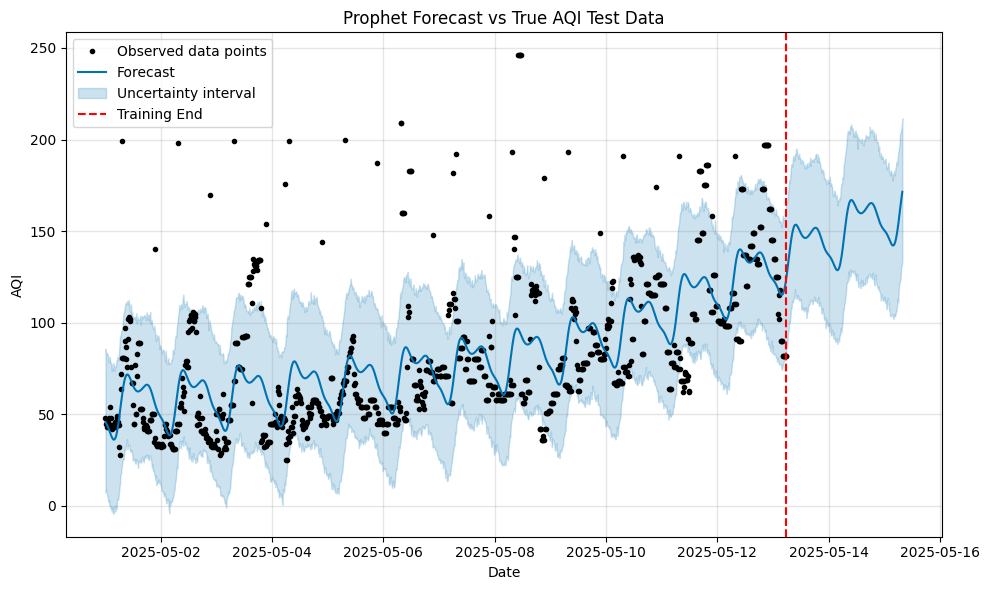

In [ ]:
# Add vertical line for training end
forecast_plot = model.plot(forecast)
axes = forecast_plot.gca()
last_training_date = df_prophet['ds'].max()
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')
plt.legend()
plt.title("Prophet Forecast vs True AQI Test Data")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.tight_layout()
plt.show()

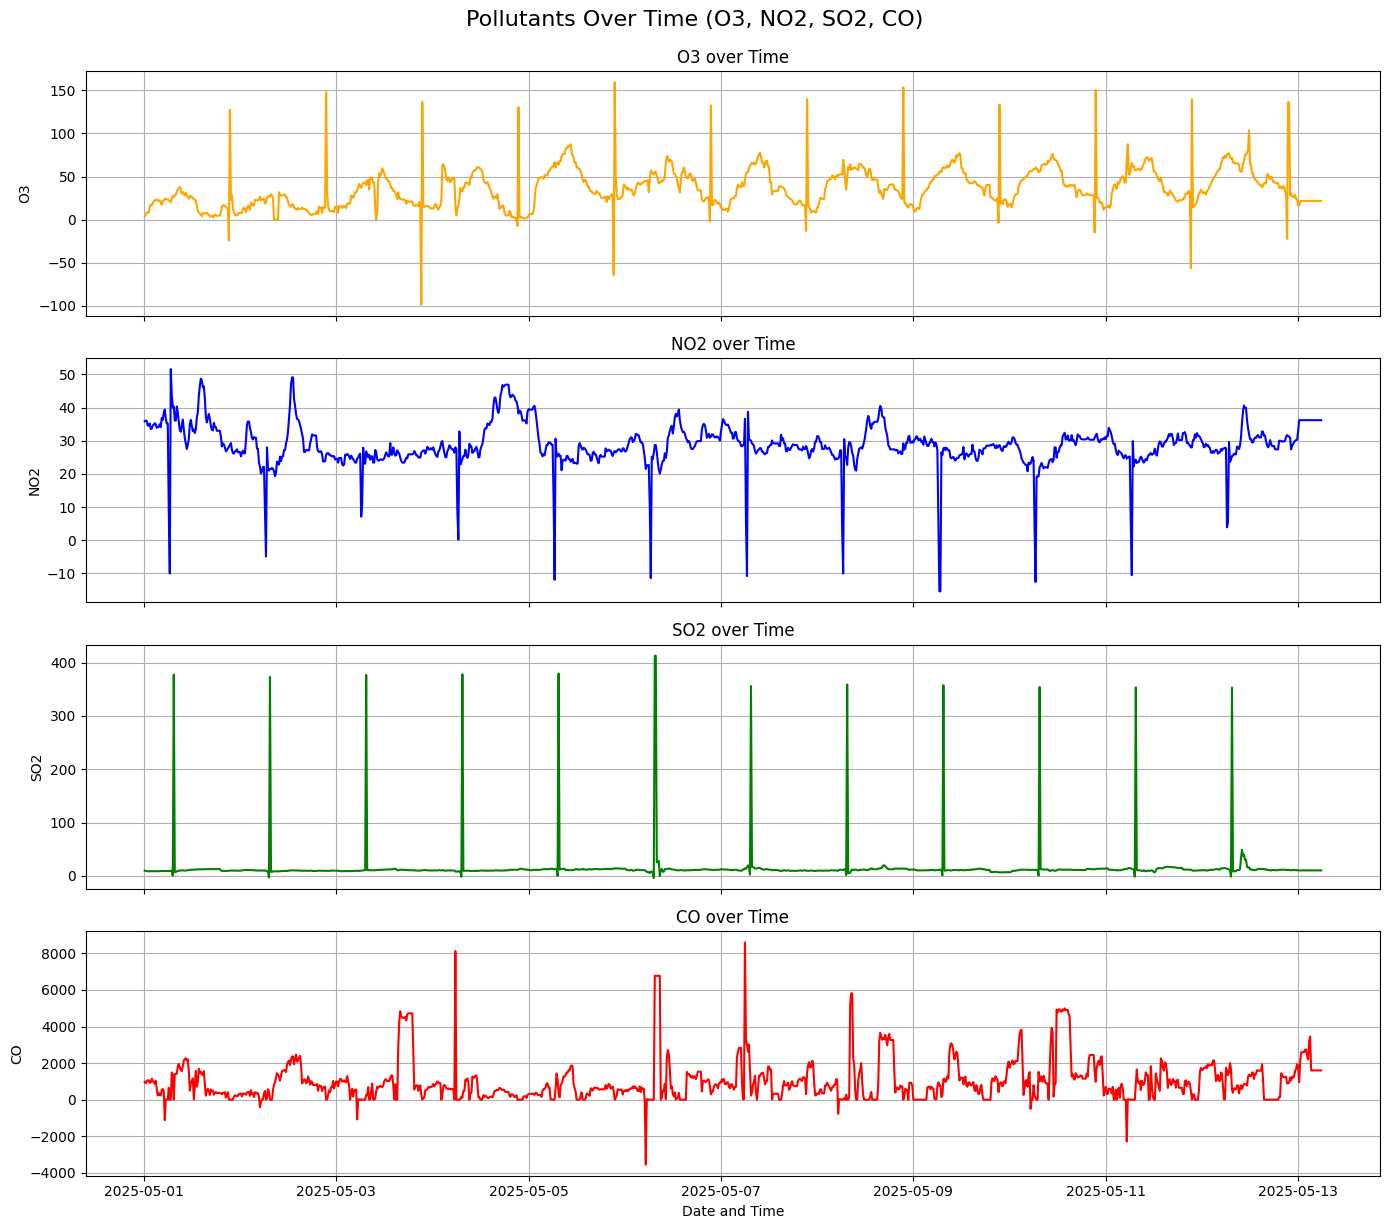

In [ ]:
# Create subplots for deeper visualization of O3, NO2, SO2, and CO over time
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

pollutants = ['o3', 'no2', 'so2', 'co']
colors = ['orange', 'blue', 'green', 'red']

for i, pollutant in enumerate(pollutants):
    axes[i].plot(df_resampled['datetimeUtc'], df_resampled[pollutant], color=colors[i])
    axes[i].set_ylabel(f'{pollutant.upper()}')
    axes[i].set_title(f'{pollutant.upper()} over Time')
    axes[i].grid(True)

axes[-1].set_xlabel('Date and Time')
plt.tight_layout()
plt.suptitle('Pollutants Over Time (O3, NO2, SO2, CO)', fontsize=16, y=1.02)
plt.show()

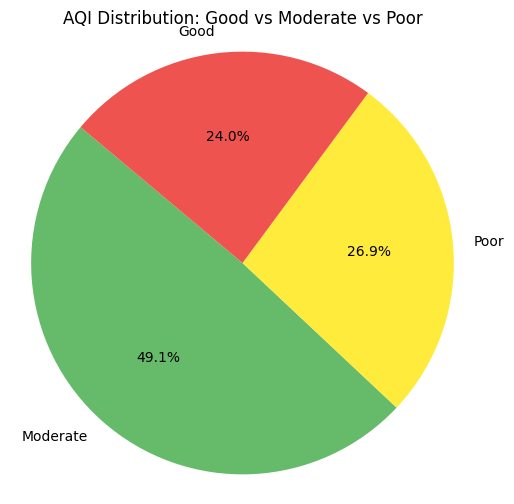

In [ ]:
# Define AQI categories for pie chart
def classify_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    else:
        return "Poor"

# Apply classification
df['AQI_Category'] = df['AQI'].apply(classify_aqi)

# Count the categories
aqi_counts = df['AQI_Category'].value_counts()

# Plot pie chart
colors = ['#66bb6a', '#ffeb3b', '#ef5350']  # Green for Good, Yellow for Moderate, Red for Poor
plt.figure(figsize=(6, 6))
plt.pie(aqi_counts, labels=aqi_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('AQI Distribution: Good vs Moderate vs Poor')
plt.axis('equal')  # Keep pie chart circular
plt.show()

#Insight:
Controlling PM2.5 and PM10 can have the most significant impact on improving AQI.

Random Forest is the best-performing model for AQI prediction in this scenario

Linear Regression is suitable for basic trend analysis, but not for precise AQI prediction, especially during pollution spikes

Prophet is valuable for early warnings and proactive environmental planning.

Time-based visualizations help in identifying pollution sources and timing, aiding regulatory action.